In [1]:
import pandas as pd 
import numpy as np
import os 

In [2]:
df = pd.read_csv('vaccinations_by_practices_month.csv',encoding = 'utf-8')

In [3]:
df.head()

,vacc,prac,week,year,totalweek
0,VAXNEUVANCE,Pediatric Medical World,1.0,2023.0,9
1,VAXNEUVANCE,Pediatric Medical World,12.0,2022.0,3
2,VAXELIS,Margaret Safo,11.0,2022.0,1
3,VAXELIS,Margaret Safo,12.0,2022.0,1
4,VAXELIS,Pediatric Medical World,12.0,2022.0,1


In [4]:
practices = sorted( df['prac'].unique() )
vaccines = sorted( df['vacc'].unique() ) 

In [5]:
practices

['Dr. Gamundi',
 'Dr. Gupta',
 'Dr. Kolesnikov',
 'Emmett Pediatric Associates',
 'Margaret Safo',
 'Pediatric Medical World',
 'Western Care PC',
 'Western Care Su Salud']

In [6]:
vaccines

['ActHIB',
 'Adacel',
 'BOOSTRIX',
 'Bexsero',
 'DAPTACEL',
 'ENGERIX-B',
 'FLUARIX QUADRIVALENT',
 'FLUZONE',
 'FLUZONE QUADRIVALENT',
 'FLUZONE QUADRIVALENT NORTHERN HEMISPHERE',
 'Flulaval Quadrivalent',
 'GARDASIL 9',
 'HAVRIX',
 'HIBERIX',
 'Hiberix',
 'INFANRIX',
 'IPOL',
 'KINRIX',
 'M-M-R II',
 'MenQuadfi',
 'Menactra',
 'Menveo',
 'PEDIARIX',
 'PENTACEL',
 'PREVNAR 13',
 'PedvaxHIB',
 'Prevnar 20',
 'ProQuad',
 'QUADRACEL',
 'RECOMBIVAX HB',
 'ROTARIX',
 'RotaTeq',
 'Shingrix',
 'TENIVAC',
 'Trumenba',
 'VAQTA',
 'VARIVAX',
 'VAXELIS',
 'VAXNEUVANCE']

In [7]:
df_safo_FLUZONE_QUADRIVALENT = df[(df['prac'] == "Margaret Safo") & (df['vacc'] == "GARDASIL 9")]
#df_safo_FLUZONE_QUADRIVALENT = df[(df['vacc'] == "GARDASIL 9")]

In [8]:
df_safo_FLUZONE_QUADRIVALENT

,vacc,prac,week,year,totalweek
385,GARDASIL 9,Margaret Safo,6.0,2022.0,2
395,GARDASIL 9,Margaret Safo,1.0,2023.0,4
396,GARDASIL 9,Margaret Safo,4.0,2022.0,6
397,GARDASIL 9,Margaret Safo,3.0,2022.0,5
406,GARDASIL 9,Margaret Safo,7.0,2022.0,5
407,GARDASIL 9,Margaret Safo,8.0,2022.0,3
408,GARDASIL 9,Margaret Safo,9.0,2022.0,7
409,GARDASIL 9,Margaret Safo,5.0,2022.0,3
414,GARDASIL 9,Margaret Safo,12.0,2022.0,2
415,GARDASIL 9,Margaret Safo,11.0,2022.0,4


In [9]:
import matplotlib.pyplot as plt   #66 94 73

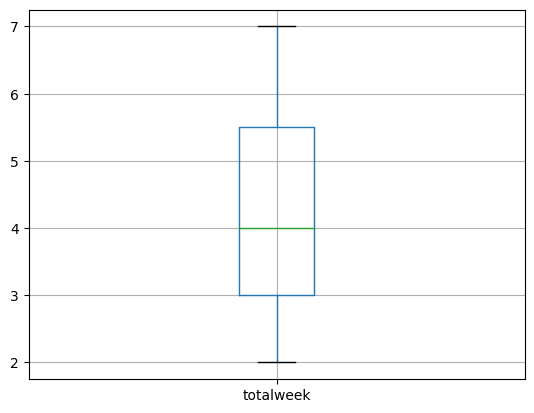

In [10]:
df_safo_FLUZONE_QUADRIVALENT.boxplot(column=['totalweek'])
plt.show()

In [11]:
#automatizar la deteccion y eliminado de anomalias

In [12]:
df_safo_FLUZONE_QUADRIVALENT = df_safo_FLUZONE_QUADRIVALENT.drop(df_safo_FLUZONE_QUADRIVALENT.index[df_safo_FLUZONE_QUADRIVALENT['totalweek'] > 14])

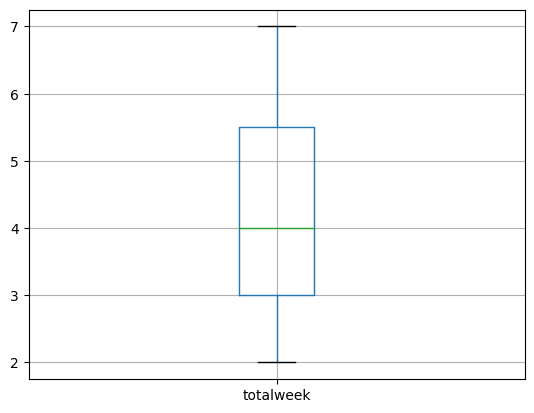

In [13]:
df_safo_FLUZONE_QUADRIVALENT.boxplot(column=['totalweek'])
plt.show()

In [14]:
df_safo_FLUZONE_QUADRIVALENT

,vacc,prac,week,year,totalweek
385,GARDASIL 9,Margaret Safo,6.0,2022.0,2
395,GARDASIL 9,Margaret Safo,1.0,2023.0,4
396,GARDASIL 9,Margaret Safo,4.0,2022.0,6
397,GARDASIL 9,Margaret Safo,3.0,2022.0,5
406,GARDASIL 9,Margaret Safo,7.0,2022.0,5
407,GARDASIL 9,Margaret Safo,8.0,2022.0,3
408,GARDASIL 9,Margaret Safo,9.0,2022.0,7
409,GARDASIL 9,Margaret Safo,5.0,2022.0,3
414,GARDASIL 9,Margaret Safo,12.0,2022.0,2
415,GARDASIL 9,Margaret Safo,11.0,2022.0,4


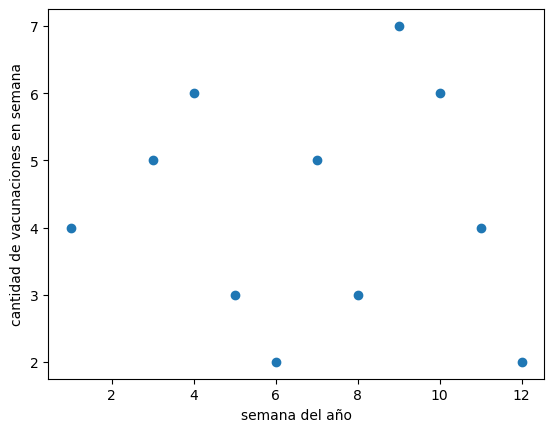

In [15]:
plt.scatter(df_safo_FLUZONE_QUADRIVALENT['week'], df_safo_FLUZONE_QUADRIVALENT['totalweek'])
plt.xlabel('semana del año')
plt.ylabel('cantidad de vacunaciones en semana')
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [17]:
X = df_safo_FLUZONE_QUADRIVALENT[['week']]
y = df_safo_FLUZONE_QUADRIVALENT[['totalweek']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = regressor.predict(X_test)

In [20]:
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: ', mse)

Mean squared error:  1.7042547262045087


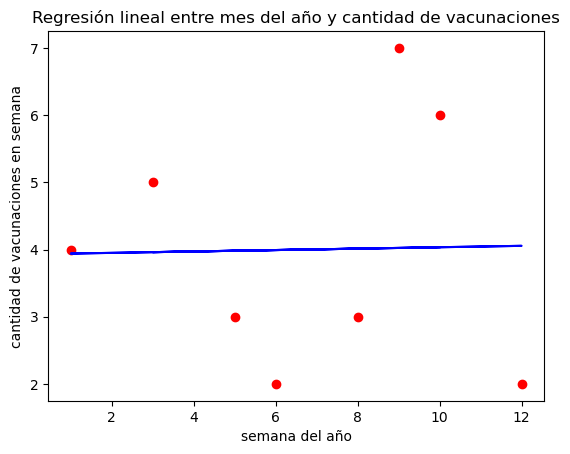

In [21]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Regresión lineal entre mes del año y cantidad de vacunaciones')
plt.xlabel('semana del año')
plt.ylabel('cantidad de vacunaciones en semana')
plt.show()

In [22]:
#pip install scipy
from scipy.interpolate import interp1d

In [23]:
x = df_safo_FLUZONE_QUADRIVALENT['week'].values 
y = df_safo_FLUZONE_QUADRIVALENT['totalweek'].values 
f = interp1d(x, y) 

In [24]:
x_new = np.linspace(x.min(), x.max(), num=12)
y_new = f(x_new)

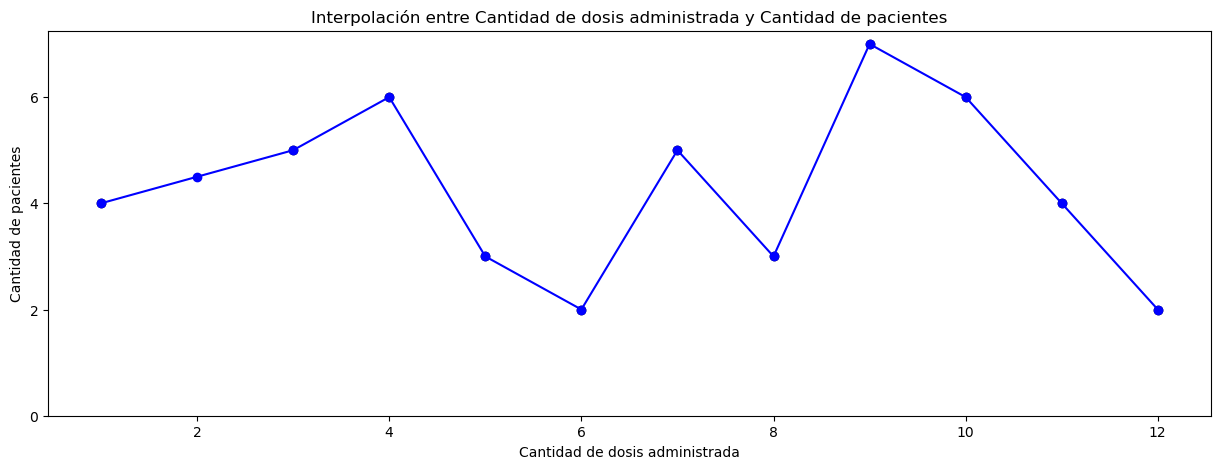

In [50]:
plt.figure(figsize=[15,5])
plt.scatter(x, y, marker='o', color='black')
plt.plot(x_new, y_new, marker='o', color='blue')
plt.title('Interpolación entre Cantidad de dosis administrada y Cantidad de pacientes')
plt.xlabel('Cantidad de dosis administrada')
plt.ylabel('Cantidad de pacientes')
plt.yticks(range(0,8,2))                 
plt.show()

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [27]:
enc = LabelEncoder()
# separar datos en conjunto de entrenamiento y prueba
#X =  df_safo_FLUZONE_QUADRIVALENT[["vacc", "week", "year"]] 
X =  df_safo_FLUZONE_QUADRIVALENT[["week", "year"]] 
df_safo_FLUZONE_QUADRIVALENT["vacc"] = enc.fit_transform(df_safo_FLUZONE_QUADRIVALENT["vacc"])
y =  df_safo_FLUZONE_QUADRIVALENT["totalweek"]
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=35, test_size=0.20)

In [28]:
X_test

,week,year
407,8.0,2022.0
396,4.0,2022.0
416,10.0,2022.0


In [29]:
# Crear y entrenar el árbol de clasificación
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
X_train

,week,year
397,3.0,2022.0
408,9.0,2022.0
414,12.0,2022.0
385,6.0,2022.0
406,7.0,2022.0
395,1.0,2023.0
409,5.0,2022.0
415,11.0,2022.0


In [31]:
# Hacer predicciones en el conjunto de datos de prueba
y_pred = clf.predict(X_test)

# Comparar las predicciones con los valores reales
from sklearn.metrics import accuracy_score
print("Exactitud:", accuracy_score(y_test, y_pred))

Exactitud: 0.0


In [32]:
X_test

,week,year
407,8.0,2022.0
396,4.0,2022.0
416,10.0,2022.0


In [33]:
y_test

407    3
396    6
416    6
Name: totalweek, dtype: int64

In [34]:
print(y_pred)

[5 5 7]


In [35]:
x_reg = df_safo_FLUZONE_QUADRIVALENT['week'].values 
y_reg = df_safo_FLUZONE_QUADRIVALENT['totalweek'].values 

In [36]:
def fx(x1,coef):
    fx = 0
    n = len(coef) - 1
    for p in coef:
        fx = fx + p*x1**n
        n = n - 1
    return fx

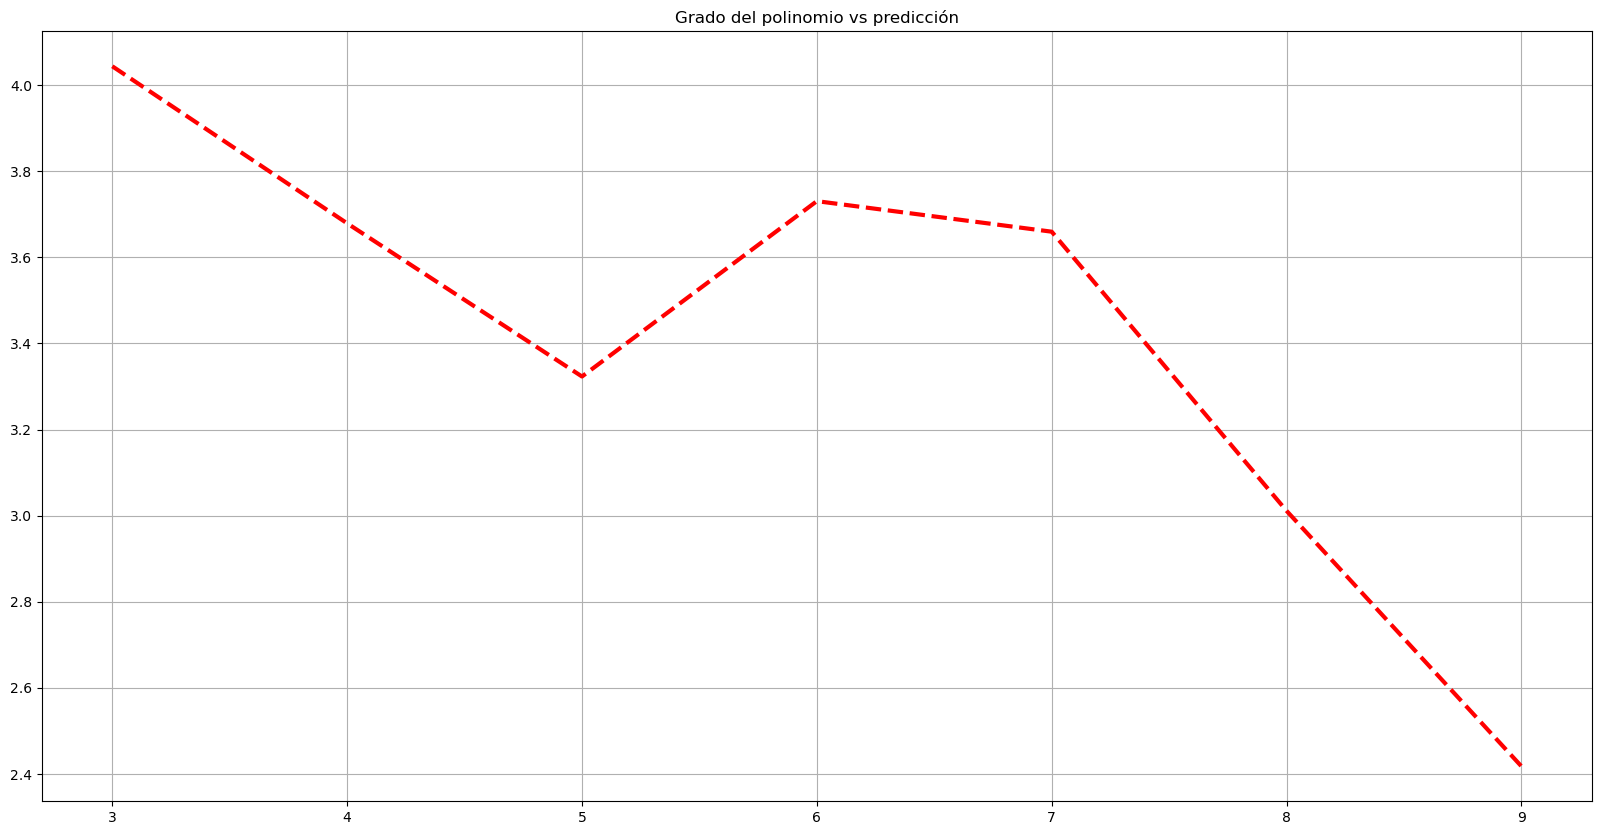

In [37]:
month = 5

x_reg = df_safo_FLUZONE_QUADRIVALENT['week'].values 
y_reg = df_safo_FLUZONE_QUADRIVALENT['totalweek'].values 

grado = np.arange( 3 ,10 ,1 ) #de 8 a 288 ce 1 en 1
aproxi = np.array([])
y_pred_vec = np.array([])
for i in grado:
        coef = np.polyfit(x_reg,y_reg,i)
        p = np.polyval (coef, month)
        aproxi= np.append(aproxi, p)
        
        # para la MSE
        y_pred_vec = np.array([])
        for j in x_reg: 
                y_pred = np.polyval (coef, j) 
                y_pred_vec = np.append(y_pred_vec,y_pred)
                #print (f"los y: {y}")
                #print(f"los y_aprox: {y_pred_vec}")
                MSE = (sum( (y_reg - y_pred_vec[0])**2 )) /len (y_reg)
                #print(f"Para grado {i} el {month} es: {MSE}")
plt.figure(figsize=[20,10])
plt.title("Grado del polinomio vs predicción") 
plt.plot(grado, aproxi, "--", linewidth=3, color='red') 
plt.grid("on")
plt.show()

In [38]:
MinimosCuadrados = []
MinimosCuadrados = np.column_stack((grado, aproxi))
max=-1000
max_pos=0
for mc in MinimosCuadrados:
    if mc[1] > max :
        max_pos = int( mc[0] )
        max = mc[1]
max_pos

3

para el valor  5 la prediccion es 4


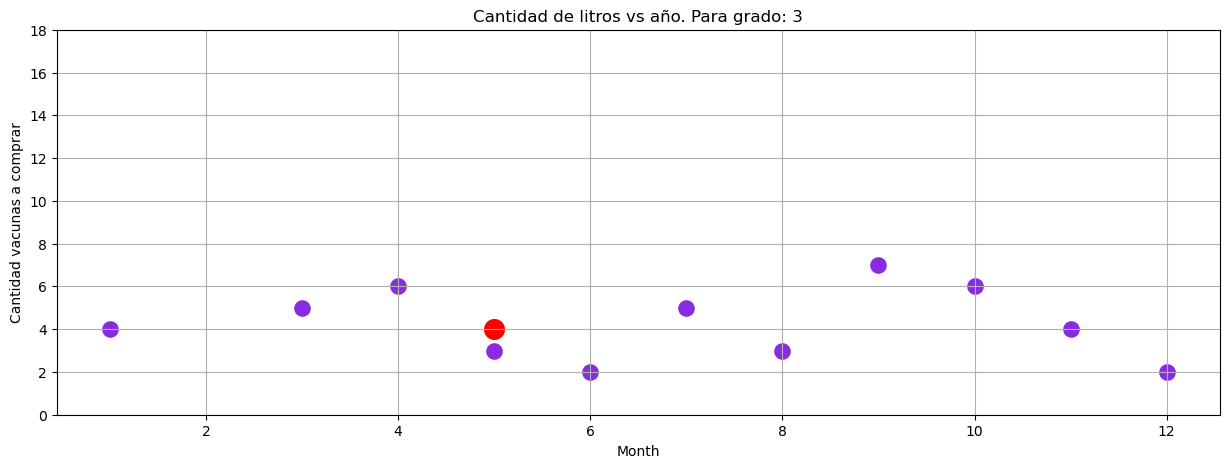

In [48]:
month = 5 
coef = np.polyfit(x_reg,y_reg,max_pos)
p = round( np.polyval(coef,month) )
print( f"para el valor  {month} la prediccion es {p}" )
x1= np.linspace (13, month+1, 0)
y1 = fx(x1, coef)   # funcion
plt.figure(figsize=[15,5])
plt.title("Cantidad de litros vs año. Para grado: "+str( max_pos ) )

plt.scatter(x,y,s=120, c='blueviolet')

plt.plot(x1,y1,"--", linewidth=3, color="orange" ) 
plt.scatter (month,p,s=200,c='red')        
plt.yticks(range(0,20,2))                 
ax = plt.gca()
ax.set_xlabel("Month")
ax.set_ylabel("Cantidad vacunas a comprar") 
plt.grid("on")
plt.show() 

In [40]:
#pip install tensorflow 

In [41]:
#pip install keras

In [42]:
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split

In [43]:
X = df_safo_FLUZONE_QUADRIVALENT['week']
y = df_safo_FLUZONE_QUADRIVALENT['totalweek']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=5)

X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

In [44]:
model = Sequential()

In [45]:
model.add(Dense(28, input_shape=(1,), activation='sigmoid'))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train, epochs=10, batch_size=4, validation_split=0.05)

#inicio test
number = 5
number_array = np.array([number]).reshape(-1, 1)
y_pred = model.predict(number_array)

pred = round( (y_pred[0])[0] )
pred
#fin test

#y_pred = model.predict(X_test)

Epoch 1/10
3/3 [==============================] - 1s 140ms/step - loss: 23.4382 - val_loss: 24.5462
Epoch 2/10
3/3 [==============================] - 0s 28ms/step - loss: 22.8560 - val_loss: 23.9712
Epoch 3/10
3/3 [==============================] - 0s 28ms/step - loss: 22.2625 - val_loss: 23.3959
Epoch 4/10
3/3 [==============================] - 0s 28ms/step - loss: 21.6894 - val_loss: 22.8253
Epoch 5/10
3/3 [==============================] - 0s 28ms/step - loss: 21.1330 - val_loss: 22.2679
Epoch 6/10
3/3 [==============================] - 0s 28ms/step - loss: 20.5531 - val_loss: 21.7213
Epoch 7/10
3/3 [==============================] - 0s 28ms/step - loss: 20.0245 - val_loss: 21.1723
Epoch 8/10
3/3 [==============================] - 0s 28ms/step - loss: 19.4912 - val_loss: 20.6246
Epoch 9/10
3/3 [==============================] - 0s 28ms/step - loss: 18.9935 - val_loss: 20.0882
Epoch 10/10
1/1 [==============================] - 0s 125ms/step


1

In [46]:
from sklearn.metrics import mean_squared_error
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, y_pred)))

Mean squared error: 6.19


In [47]:
type(y_pred)

numpy.ndarray